# **Домашняя работа по дисциплине: "Методы машинного обучения" Автор:Наседкин Игорь, группа:ИУ5-23М**

## **Постановка задачи**
Домашнее задание по дисциплине направлено на решение комплексной задачи машинного обучения. Домашнее задание включает выполнение следующих шагов:

1)Поиск и выбор набора данных для построения моделей машинного обучения. На основе выбранного набора данных студент должен построить модели машинного обучения для решения или задачи классификации, или задачи регрессии.+

2)Проведение разведочного анализа данных. Построение графиков, необходимых для понимания структуры данных. Анализ и заполнение пропусков в данных.

3)Выбор признаков, подходящих для построения моделей. Кодирование категориальных признаков. Масштабирование данных. Формирование вспомогательных признаков, улучшающих качество моделей.

4)Проведение корреляционного анализа данных. Формирование промежуточных выводов о возможности построения моделей машинного обучения. В зависимости от набора данных, порядок выполнения пунктов 2, 3, 4 может быть изменен.

5)Выбор метрик для последующей оценки качества моделей. Необходимо выбрать не менее двух метрик и обосновать выбор.

6)Выбор наиболее подходящих моделей для решения задачи классификации или регрессии. Необходимо использовать не менее трех моделей, хотя бы одна из которых должна быть ансамблевой.

7)Формирование обучающей и тестовой выборок на основе исходного набора данных.

8)Построение базового решения (baseline) для выбранных моделей без подбора гиперпараметров. Производится обучение моделей на основе обучающей выборки и оценка качества моделей на основе тестовой выборки.

9)Подбор гиперпараметров для выбранных моделей. Рекомендуется подбирать не более 1-2 гиперпараметров. Рекомендуется использовать методы кросс-валидации. В зависимости от используемой библиотеки можно применять функцию GridSearchCV, использовать перебор параметров в цикле, или использовать другие методы.

10)Повторение пункта 8 для найденных оптимальных значений гиперпараметров.
Сравнение качества полученных моделей с качеством baseline-моделей.

11)Формирование выводов о качестве построенных моделей на основе выбранных метрик.

# **1) Для задачи классификации был выбран датасет грибов**.
https://www.kaggle.com/uciml/mushroom-classification
About this file

# **Attribute Information(Атрибуты)**: (classes: edible=e, poisonous=p(**классы - ядовитый, съедобный**))

**cap-shape**: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s # **форма шляпки**

**cap-surface**: fibrous=f,grooves=g,scaly=y,smooth=s #**тип шляпки**

**cap-color**: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y #**цвет шляпки**

**bruises**: bruises=t,no=f #**темнеет при повреждении или нет(синяки)**

**odor**: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s #**запах**

**gill-attachment**: attached=a,descending=d,free=f,notched=n #**крепление гимениальной пластинки**

**gill-spacing**: close=c,crowded=w,distant=d #**расположение гимениальной пластинки**

**gill-size**: broad=b,narrow=n #**размер гимениальной пластинки**

**gill-color**: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y #**цвет гимениальной пластинки**

**stalk-shape**: enlarging=e,tapering=t #**форма ножки**

**stalk-root**: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=? # **корневище**

**stalk-surface-above-ring**: fibrous=f,scaly=y,silky=k,smooth=s #**кольцо на ножке над поверхностью земли**

**stalk-surface-below-ring**: fibrous=f,scaly=y,silky=k,smooth=s #**кольцо на ножке под поверхностью земли**

**stalk-color-above-ring**: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y #**цвет кольца на ножке над поверхностью земли**

**stalk-color-below-ring**: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y #**цвет кольца на ножке под поверхностью земли**

**veil-type**: partial=p,universal=u #**тип велюма**

**veil-color**: brown=n,orange=o,white=w,yellow=y #**цвет велюма**

**ring-number**: none=n,one=o,two=t #**число колец**

**ring-type**: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z #**тип колец**

**spore-print-color**: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y #**цвет спор**

**population**: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y #**тип совместного произрастания**

**habitat**: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d #**место произрастания**

**Импортируем библиотеки:**

In [2]:
!pip install gmdhpy
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score 
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.svm import SVC, NuSVC, LinearSVC, OneClassSVM, SVR, NuSVR, LinearSVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import ExtraTreesClassifier, ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from gmdhpy import gmdh
%matplotlib inline 
sns.set(style="ticks")

In [0]:
# Отрисовка ROC-кривой
def draw_roc_curve(y_true, y_score, pos_label=1, average='micro'):
    fpr, tpr, thresholds = roc_curve(y_true, y_score, 
                                     pos_label=pos_label)
    roc_auc_value = roc_auc_score(y_true, y_score, average=average)
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_value)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

## **Загрузка данных**

In [0]:
data = pd.read_csv('mushrooms.csv', sep=",")

# **2) Проведение разведочного анализа данных. Построение графиков, необходимых для понимания структуры данных. Анализ и заполнение пропусков в данных.**

In [5]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [6]:
data.shape

(8124, 23)

In [30]:
data.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [31]:
data.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [7]:
data.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

**Вывод. Представленный набор данных не содержит пропусков ни в обучающей, ни в тестовой выборках**

Построим некоторые графики для понимания структуры данных:
(Данные графики в связи с особенностями датасета приводятся в следующем пункте)

In [35]:
data['class'].unique()

array(['p', 'e'], dtype=object)

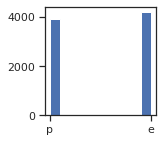

In [40]:
# Оценим дисбаланс классов для Occupancy
fig, ax = plt.subplots(figsize=(2,2)) 
plt.hist(data['class'])
plt.show()

In [41]:
data['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

In [42]:
# посчитаем дисбаланс классов
total = data.shape[0]
class_0, class_1 = data['class'].value_counts()
print('Класс 0 составляет {}%, а класс 1 составляет {}%.'
      .format(round(class_0 / total, 4)*100, round(class_1 / total, 4)*100))

Класс 0 составляет 51.800000000000004%, а класс 1 составляет 48.199999999999996%.


**Вывод. Дисбаланс классов присутствует, но является приемлемым.**

In [43]:
data.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

# **3) Выбор признаков, подходящих для построения моделей. Кодирование категориальных признаков. Масштабирование данных. Формирование вспомогательных признаков, улучшающих качество моделей.**

In [47]:
data.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

Кодирование категориальных признаков

In [0]:
le = LabelEncoder()
data['cap-shape'] = le.fit_transform(data['cap-shape'])

In [170]:
data['cap-shape'].unique()

array([5, 0, 4, 2, 3, 1])

In [172]:
np.unique(data['cap-shape'])

array([0, 1, 2, 3, 4, 5])

In [173]:
le.inverse_transform([0, 1, 2, 3])

array(['b', 'c', 'f', 'k'], dtype=object)

In [55]:
data.dtypes

class                       object
cap-shape                    int64
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [0]:
data['cap-surface'] = le.fit_transform(data['cap-surface'])
data['cap-color'] = le.fit_transform(data['cap-color'])
data['bruises'] = le.fit_transform(data['bruises'])
data['odor'] = le.fit_transform(data['odor'])
data['gill-attachment'] = le.fit_transform(data['gill-attachment'])
data['gill-spacing'] = le.fit_transform(data['gill-spacing'])
data['gill-size'] = le.fit_transform(data['gill-size'])
data['gill-color'] = le.fit_transform(data['gill-color'])
data['stalk-shape'] = le.fit_transform(data['stalk-shape'])
data['stalk-root'] = le.fit_transform(data['stalk-root'])
data['stalk-surface-above-ring'] = le.fit_transform(data['stalk-surface-above-ring'])
data['stalk-surface-below-ring'] = le.fit_transform(data['stalk-surface-below-ring'])
data['stalk-color-above-ring'] = le.fit_transform(data['stalk-color-above-ring'])
data['stalk-color-below-ring'] = le.fit_transform(data['stalk-color-below-ring'])
data['veil-type'] = le.fit_transform(data['veil-type'])
data['veil-color'] = le.fit_transform(data['veil-color'])
data['ring-number'] = le.fit_transform(data['ring-number'])
data['ring-type'] = le.fit_transform(data['ring-type'])
data['spore-print-color'] = le.fit_transform(data['spore-print-color'])
data['population'] = le.fit_transform(data['population'])
data['habitat'] = le.fit_transform(data['habitat'])
data['class'] = le.fit_transform(data['class'])

In [175]:
data.dtypes

class                       int64
cap-shape                   int64
cap-surface                 int64
cap-color                   int64
bruises                     int64
odor                        int64
gill-attachment             int64
gill-spacing                int64
gill-size                   int64
gill-color                  int64
stalk-shape                 int64
stalk-root                  int64
stalk-surface-above-ring    int64
stalk-surface-below-ring    int64
stalk-color-above-ring      int64
stalk-color-below-ring      int64
veil-type                   int64
veil-color                  int64
ring-number                 int64
ring-type                   int64
spore-print-color           int64
population                  int64
habitat                     int64
dtype: object

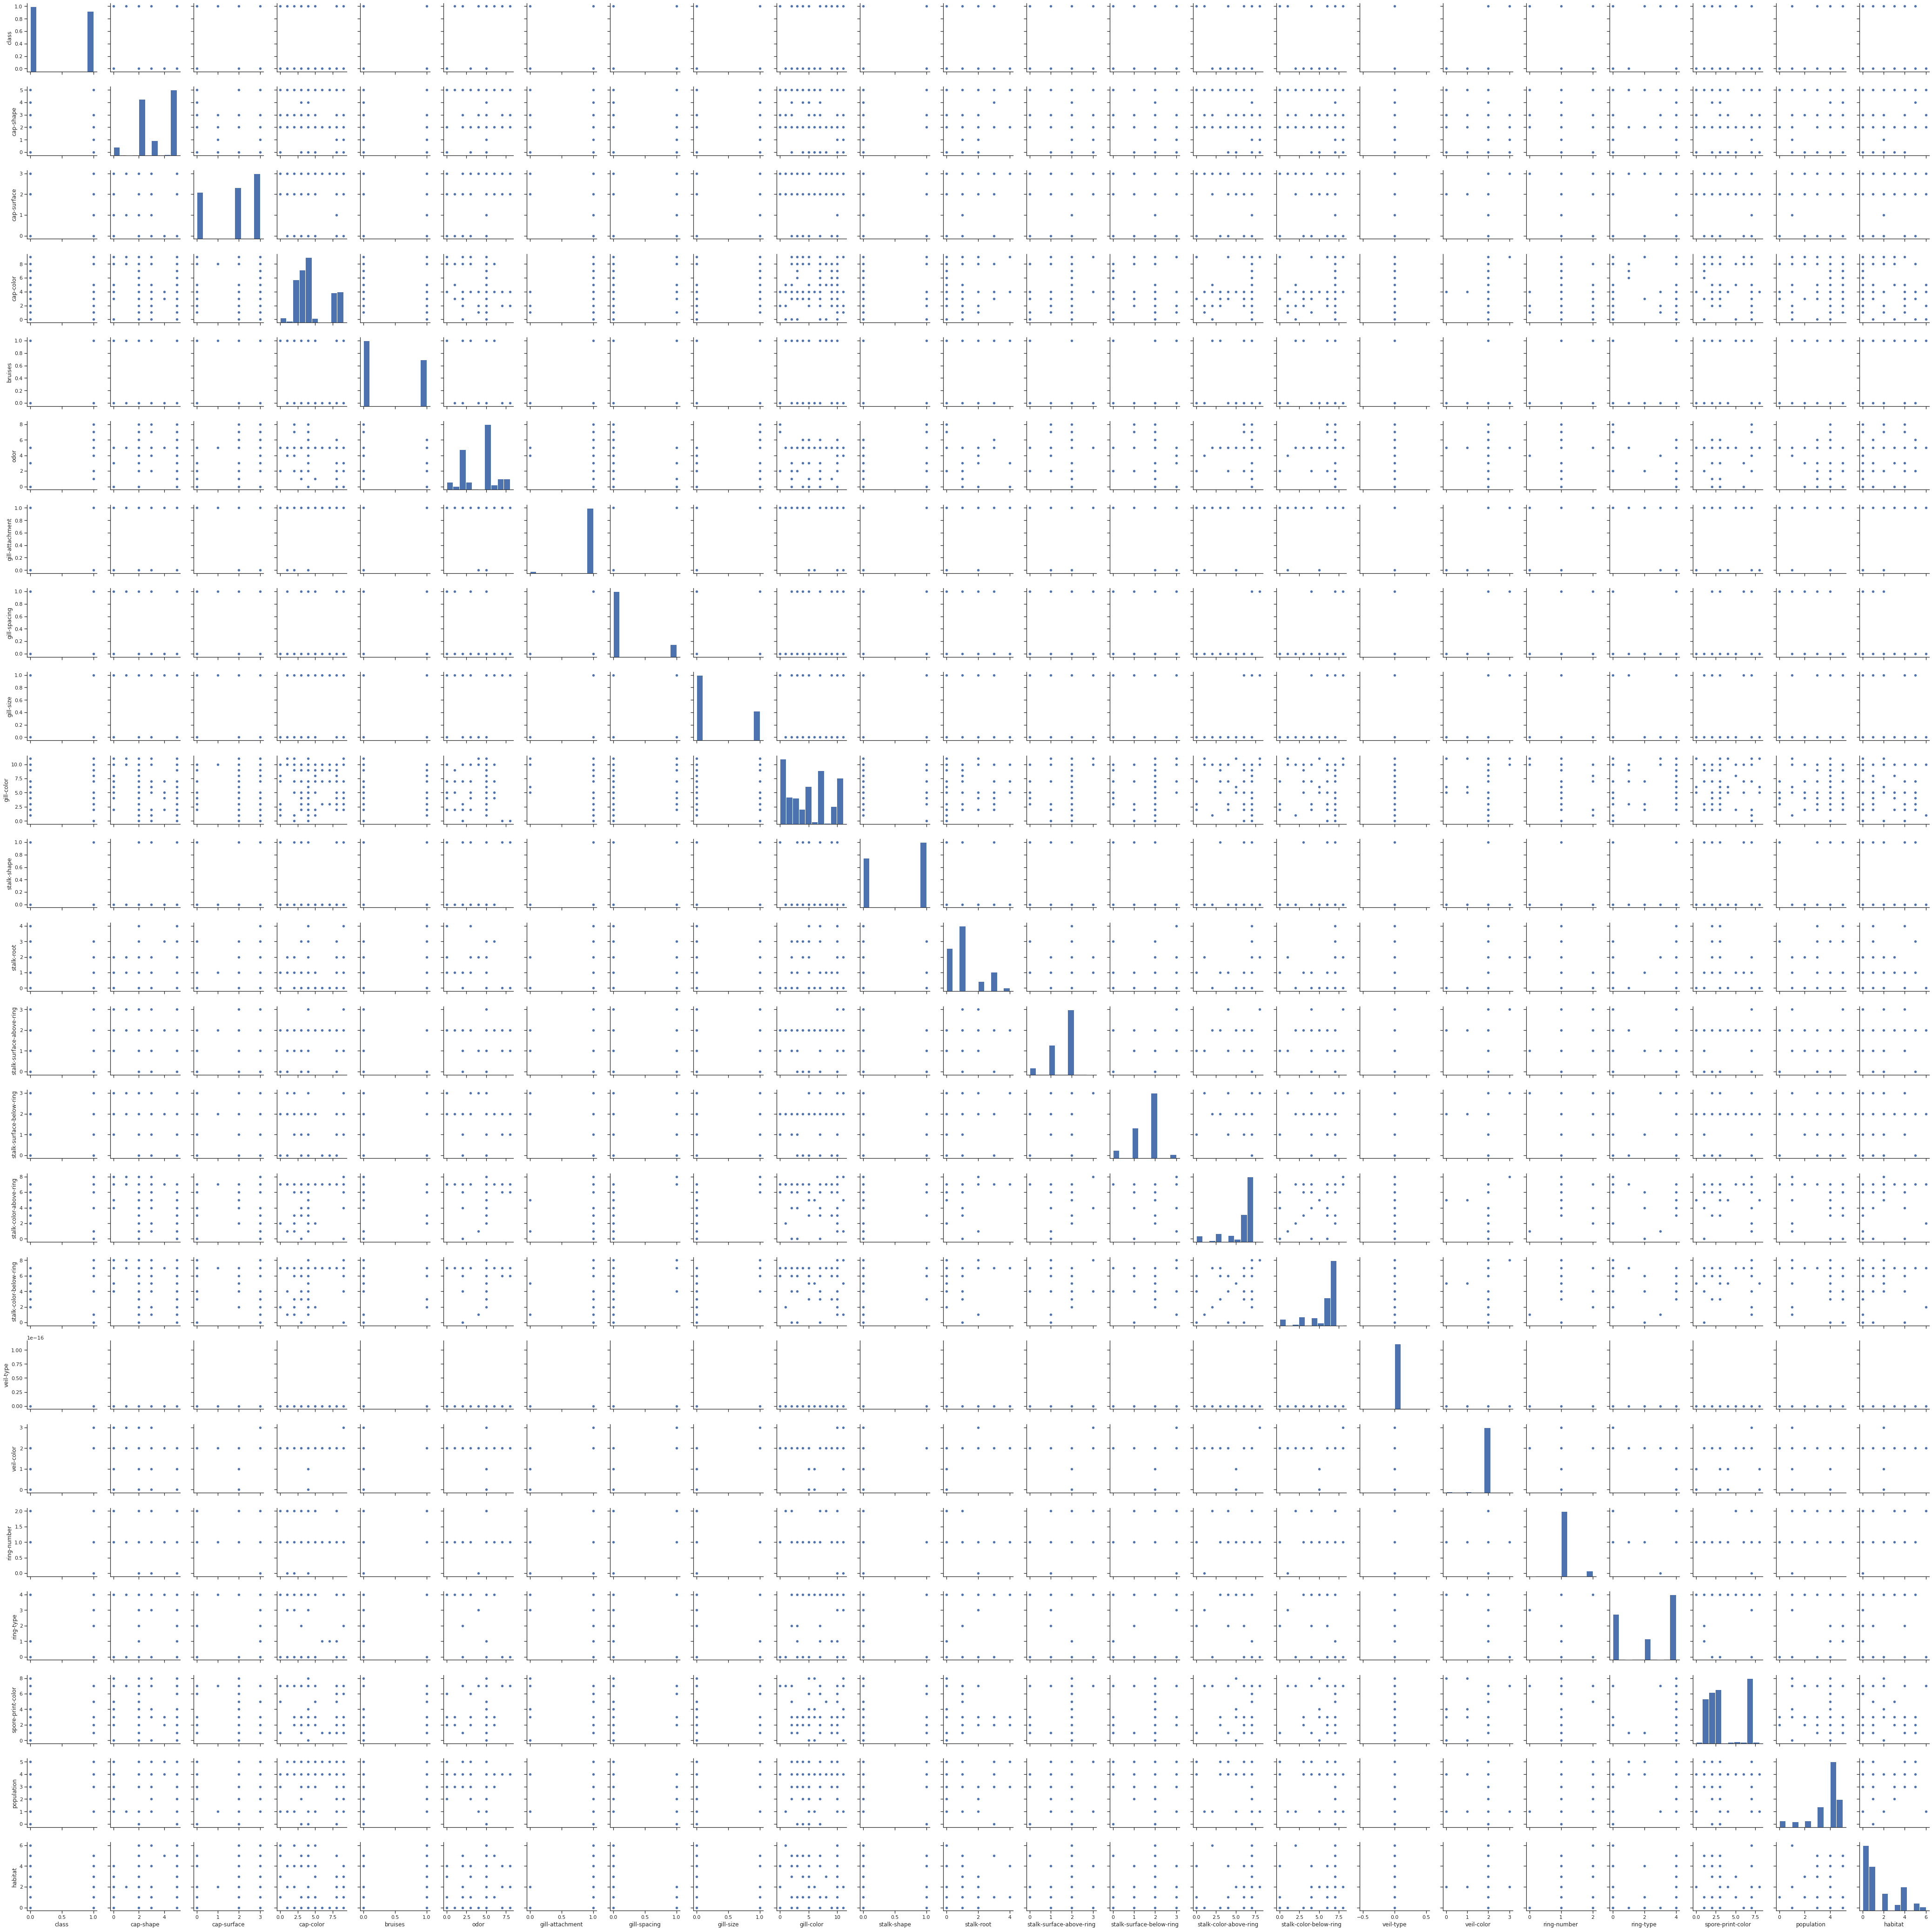

In [176]:
sns.pairplot(data)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


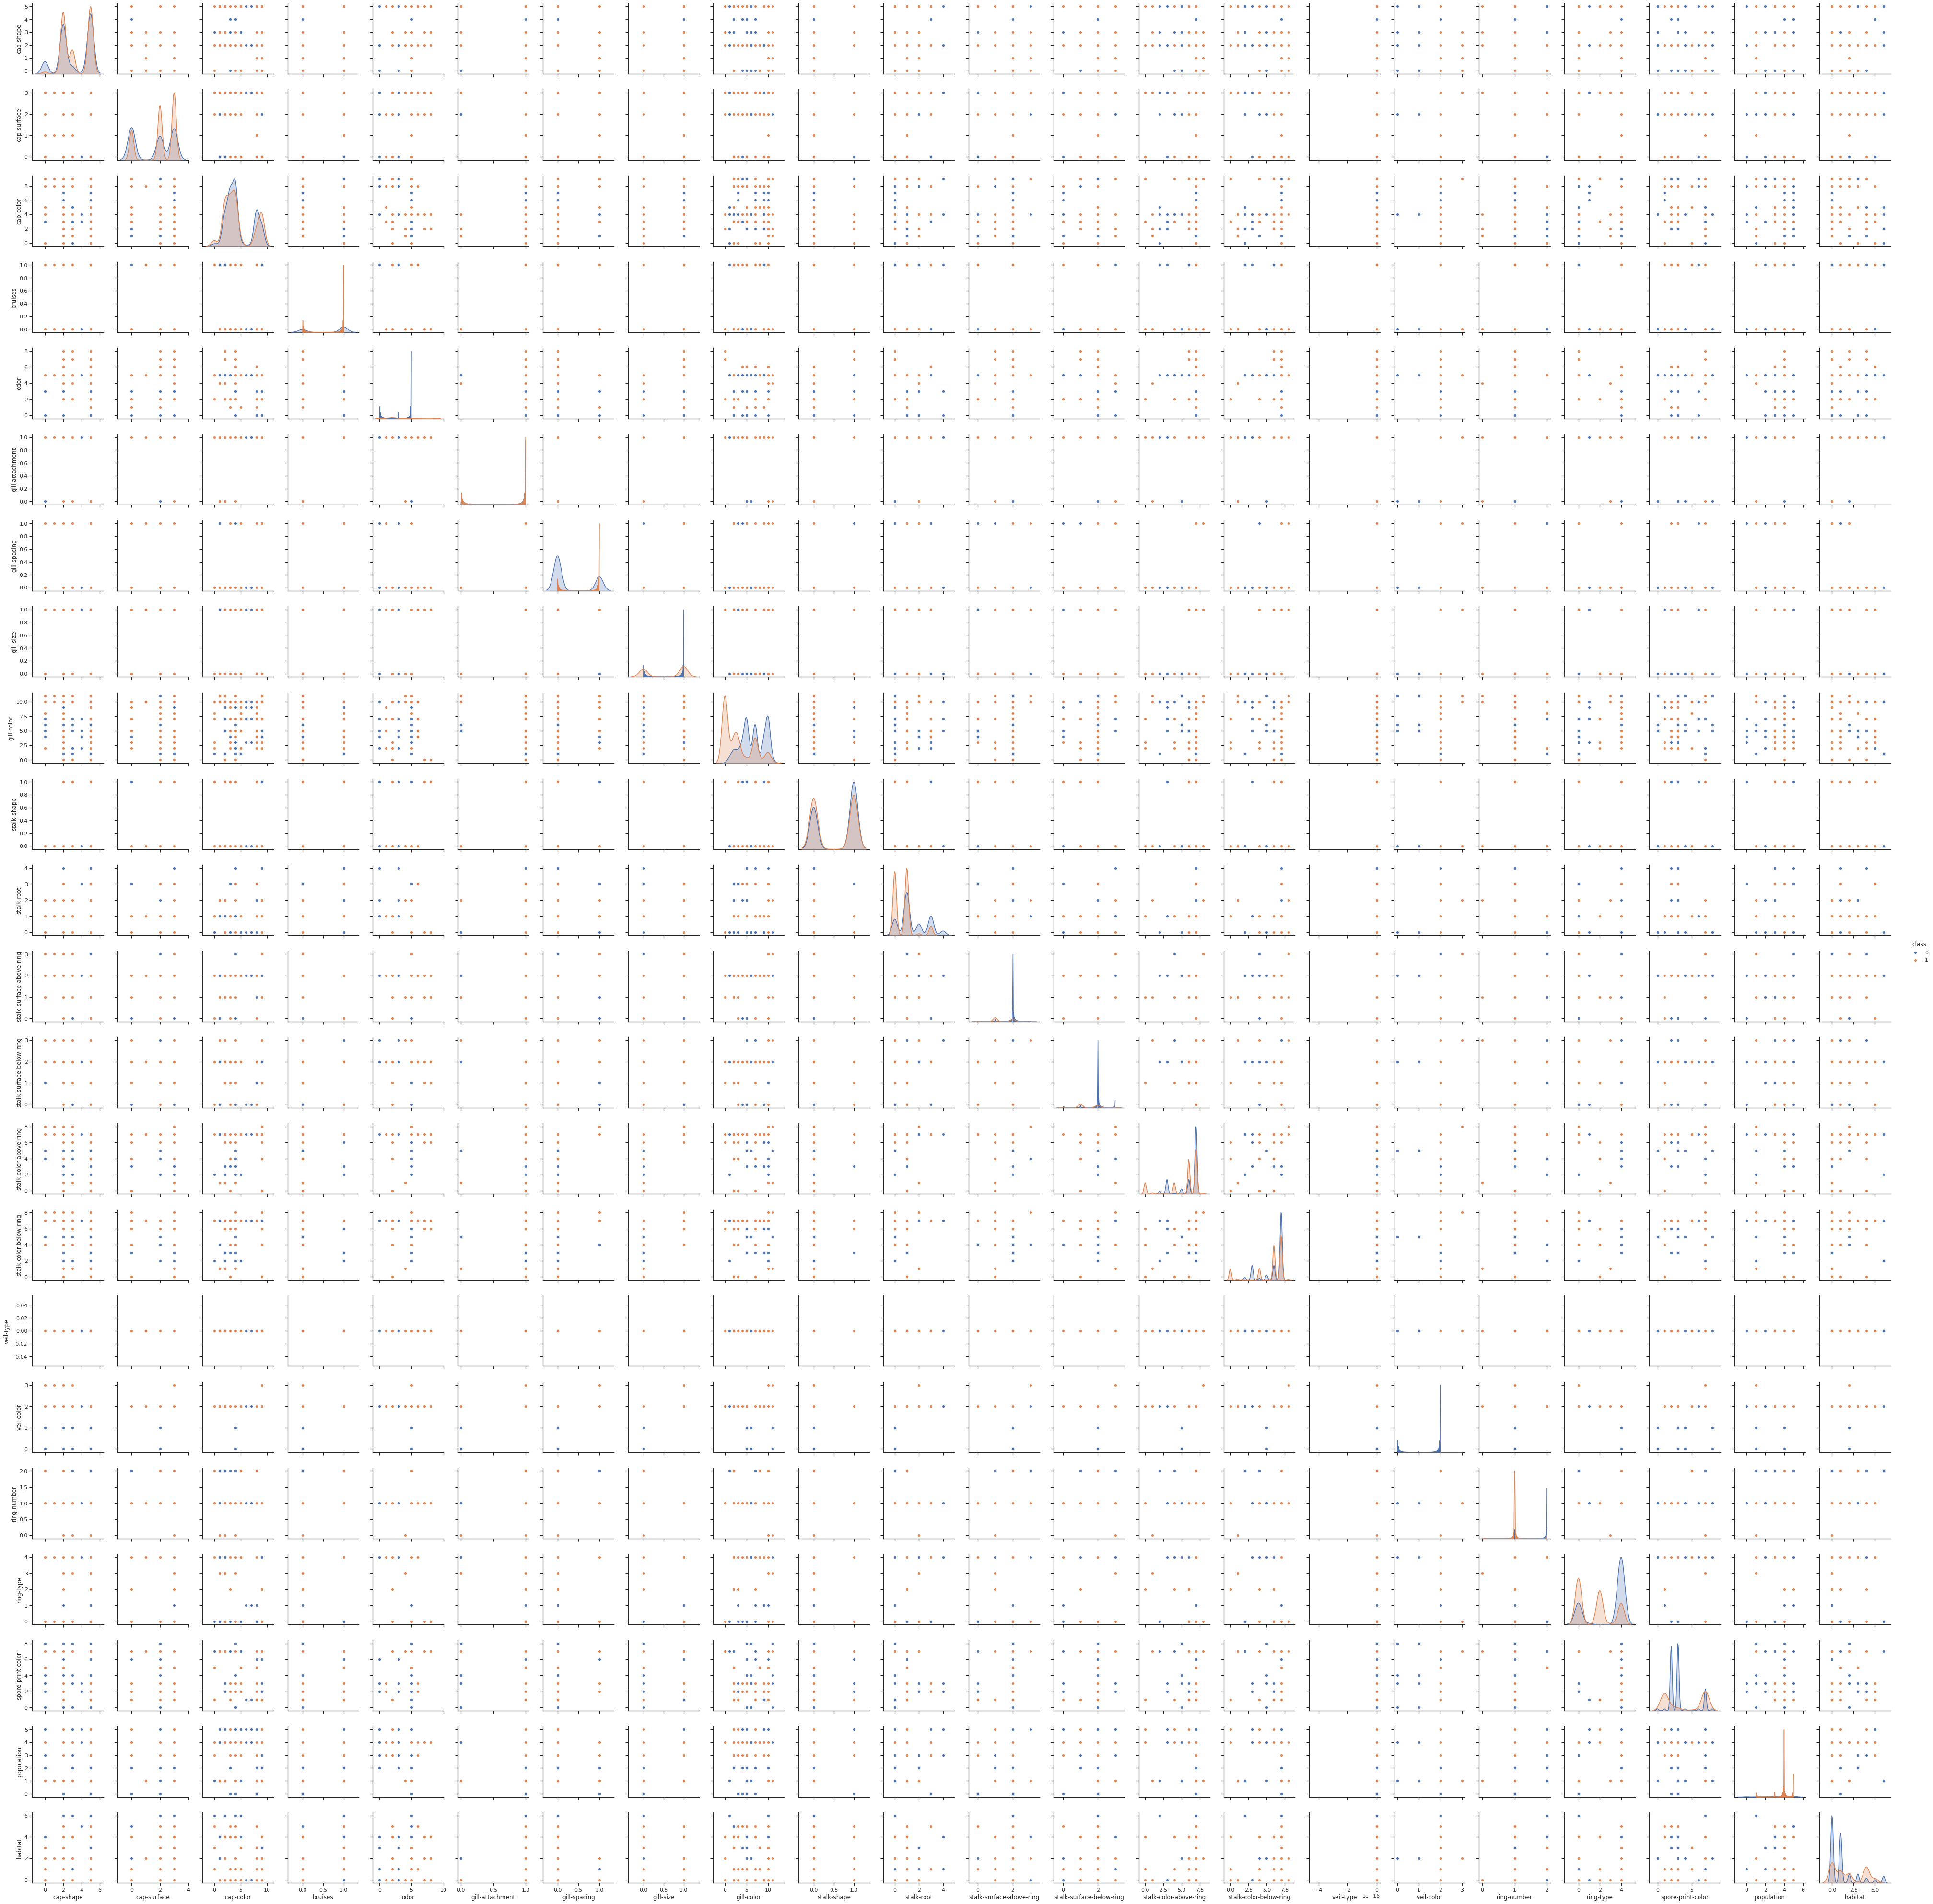

In [177]:
sns.pairplot(data, hue="class")

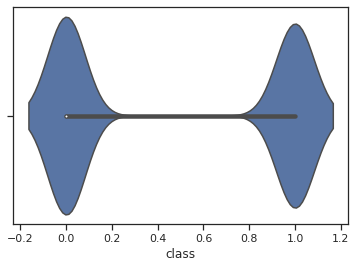

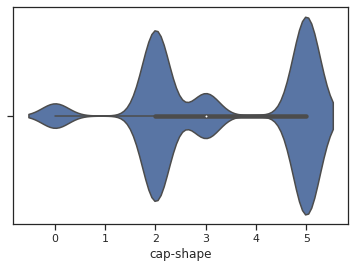

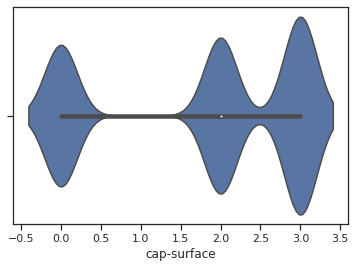

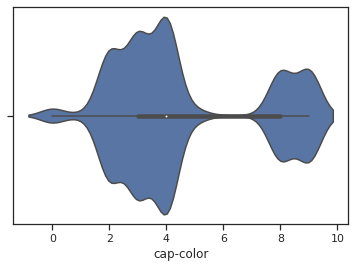

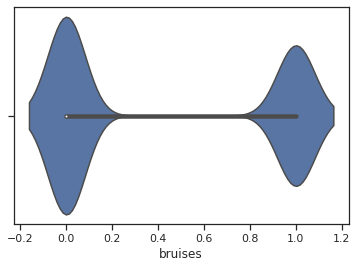

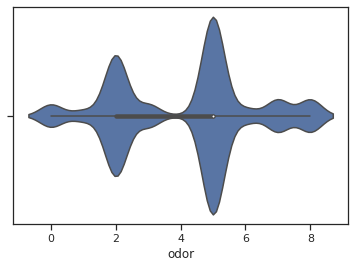

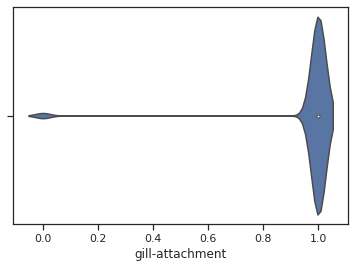

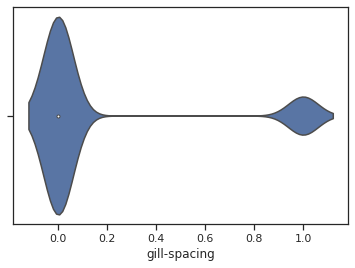

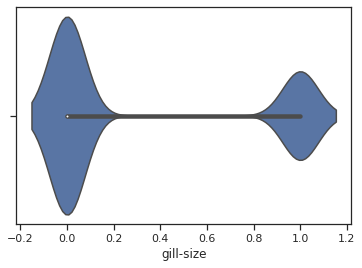

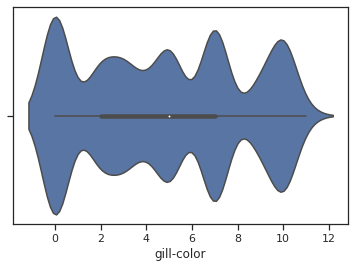

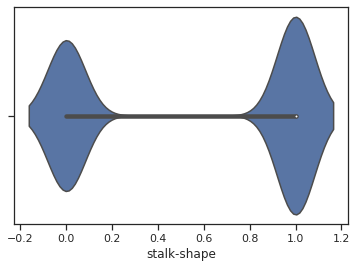

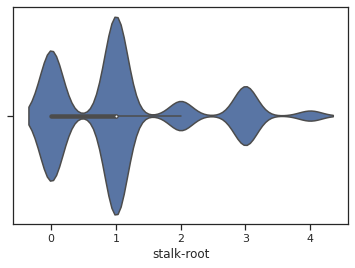

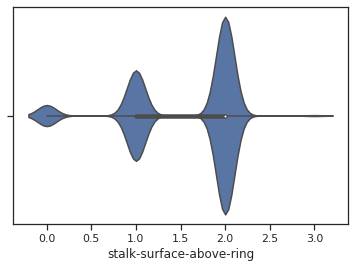

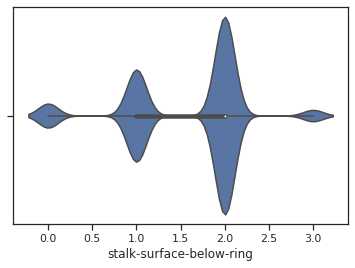

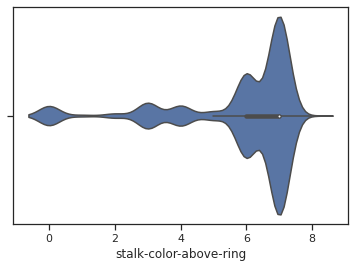

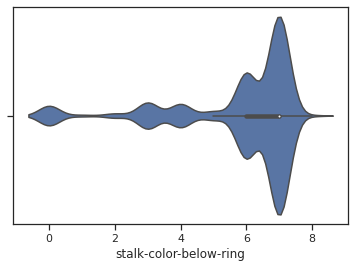

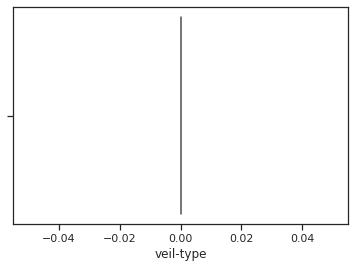

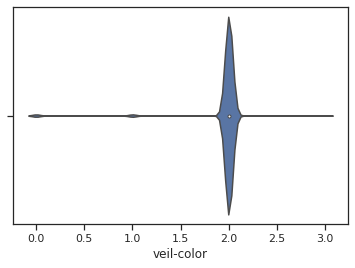

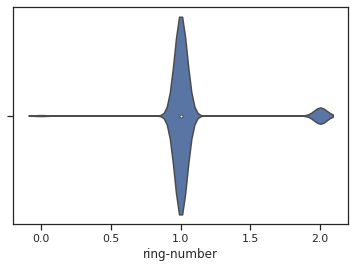

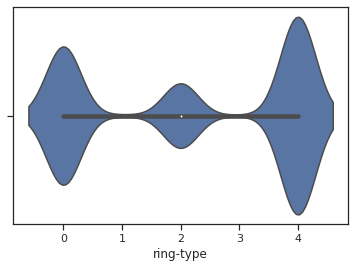

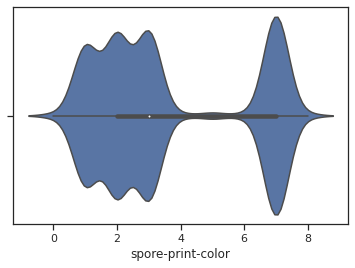

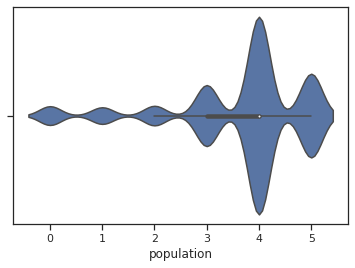

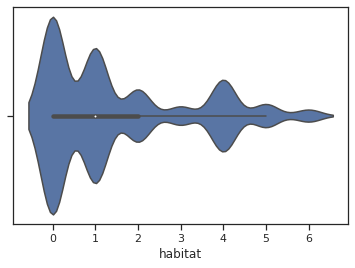

In [178]:
# Скрипичные диаграммы для числовых колонок
for col in ['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat']:
    sns.violinplot(x=data[col])
    plt.show()

Вспомогательные признаки для улучшения качества моделей в данном примере мы строить не будем.

In [68]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,0,3,2,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,0,2,2,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,0,2,2,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,0,3,2,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,1,3,2,2,7,7,0,2,1,0,3,0,1


Произведем маштабирование

In [0]:
# Числовые колонки для масштабирования
scale_cols = ['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat']

In [0]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data[scale_cols])

In [0]:
# Добавим масштабированные данные в набор данных
for i in range(len(scale_cols)):
    col = scale_cols[i]
    new_col_name = col + '_scaled'
    data[new_col_name] = sc1_data[:,i]

In [72]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class_scaled,cap-shape_scaled,cap-surface_scaled,cap-color_scaled,bruises_scaled,odor_scaled,gill-attachment_scaled,gill-spacing_scaled,gill-size_scaled,gill-color_scaled,stalk-shape_scaled,stalk-root_scaled,stalk-surface-above-ring_scaled,stalk-surface-below-ring_scaled,stalk-color-above-ring_scaled,stalk-color-below-ring_scaled,veil-type_scaled,veil-color_scaled,ring-number_scaled,ring-type_scaled,spore-print-color_scaled,population_scaled,habitat_scaled
0,1,5,2,4,1,6,1,0,1,4,0,3,2,2,7,7,0,2,1,4,2,3,5,1.0,1.0,0.666667,0.444444,1.0,0.750,1.0,0.0,1.0,0.363636,0.0,0.75,0.666667,0.666667,0.875,0.875,0.0,0.666667,0.5,1.0,0.250,0.6,0.833333
1,0,5,2,9,1,0,1,0,0,4,0,2,2,2,7,7,0,2,1,4,3,2,1,0.0,1.0,0.666667,1.000000,1.0,0.000,1.0,0.0,0.0,0.363636,0.0,0.50,0.666667,0.666667,0.875,0.875,0.0,0.666667,0.5,1.0,0.375,0.4,0.166667
2,0,0,2,8,1,3,1,0,0,5,0,2,2,2,7,7,0,2,1,4,3,2,3,0.0,0.0,0.666667,0.888889,1.0,0.375,1.0,0.0,0.0,0.454545,0.0,0.50,0.666667,0.666667,0.875,0.875,0.0,0.666667,0.5,1.0,0.375,0.4,0.500000
3,1,5,3,8,1,6,1,0,1,5,0,3,2,2,7,7,0,2,1,4,2,3,5,1.0,1.0,1.000000,0.888889,1.0,0.750,1.0,0.0,1.0,0.454545,0.0,0.75,0.666667,0.666667,0.875,0.875,0.0,0.666667,0.5,1.0,0.250,0.6,0.833333
4,0,5,2,3,0,5,1,1,0,4,1,3,2,2,7,7,0,2,1,0,3,0,1,0.0,1.0,0.666667,0.333333,0.0,0.625,1.0,1.0,0.0,0.363636,1.0,0.75,0.666667,0.666667,0.875,0.875,0.0,0.666667,0.5,0.0,0.375,0.0,0.166667


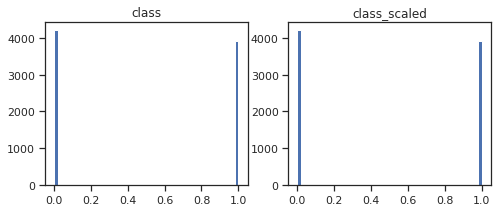

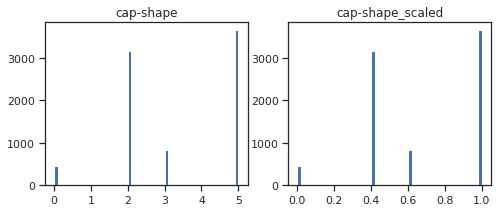

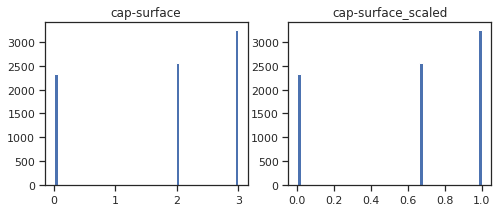

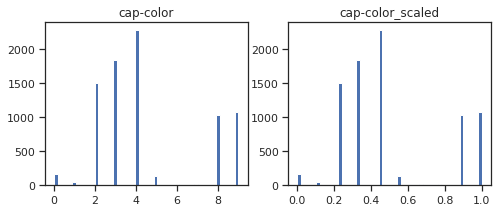

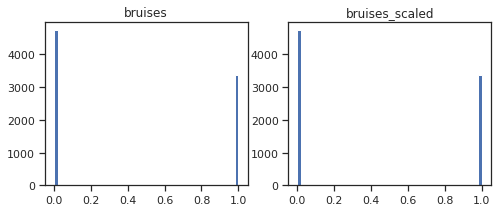

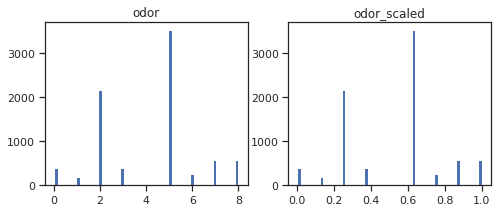

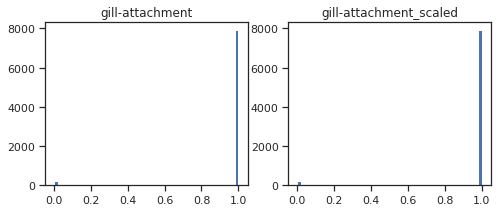

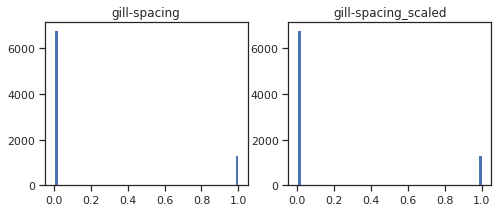

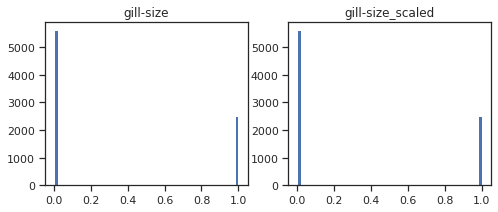

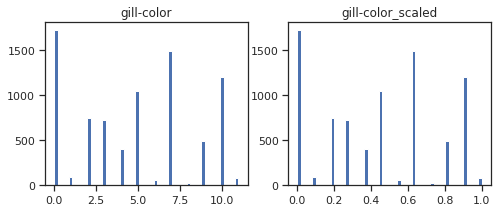

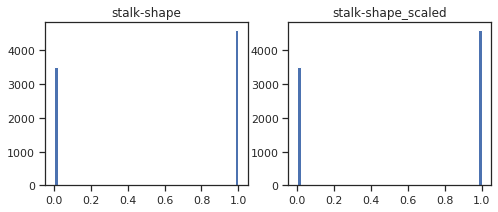

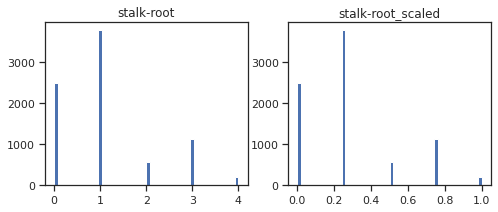

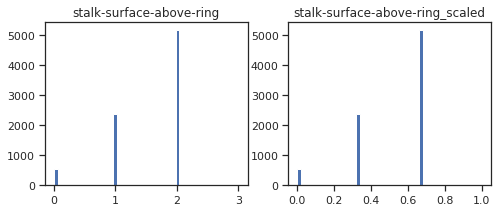

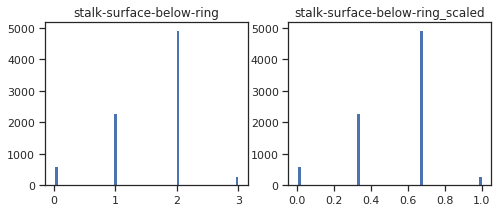

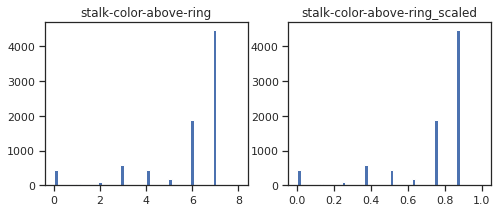

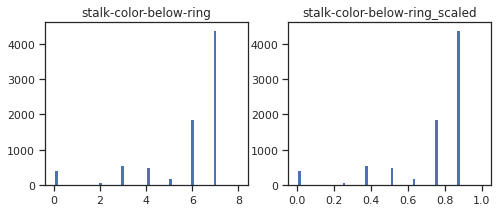

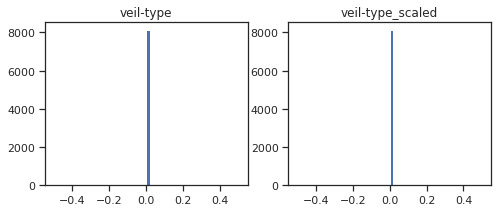

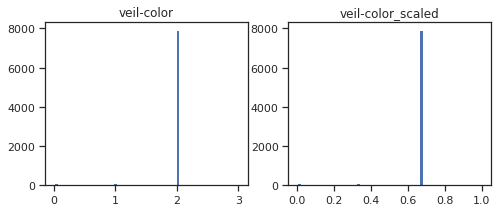

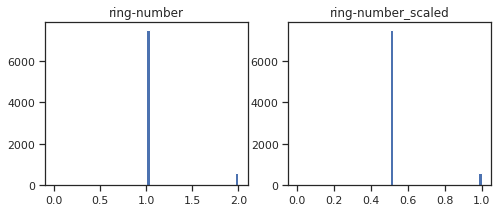

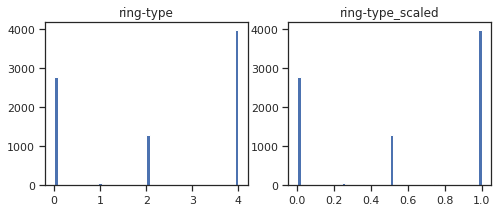

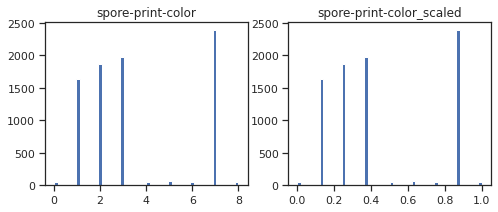

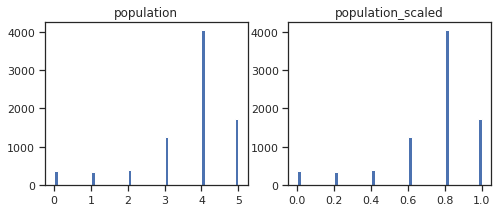

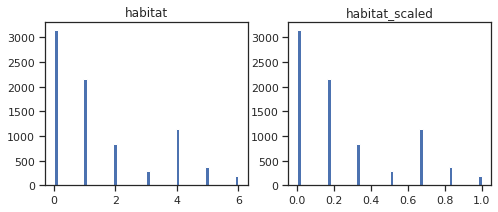

In [73]:
# Проверим, что масштабирование не повлияло на распределение данных
for col in scale_cols:
    col_scaled = col + '_scaled'

    fig, ax = plt.subplots(1, 2, figsize=(8,3))
    ax[0].hist(data[col], 50)
    ax[1].hist(data[col_scaled], 50)
    ax[0].title.set_text(col)
    ax[1].title.set_text(col_scaled)
    plt.show()

# **4) Проведение корреляционного анализа данных. Формирование промежуточных выводов о возможности построения моделей машинного обучения.**

In [74]:
# Воспользуемся наличием тестовых выборок, 
# включив их в корреляционную матрицу
corr_cols_1 = scale_cols
corr_cols_1

['class',
 'cap-shape',
 'cap-surface',
 'cap-color',
 'bruises',
 'odor',
 'gill-attachment',
 'gill-spacing',
 'gill-size',
 'gill-color',
 'stalk-shape',
 'stalk-root',
 'stalk-surface-above-ring',
 'stalk-surface-below-ring',
 'stalk-color-above-ring',
 'stalk-color-below-ring',
 'veil-type',
 'veil-color',
 'ring-number',
 'ring-type',
 'spore-print-color',
 'population',
 'habitat']

In [0]:
cols_later = corr_cols_1 + ['class_scaled']

In [75]:
scale_cols_postfix = [x+'_scaled' for x in scale_cols]
corr_cols_2 = scale_cols_postfix
corr_cols_2

['class_scaled',
 'cap-shape_scaled',
 'cap-surface_scaled',
 'cap-color_scaled',
 'bruises_scaled',
 'odor_scaled',
 'gill-attachment_scaled',
 'gill-spacing_scaled',
 'gill-size_scaled',
 'gill-color_scaled',
 'stalk-shape_scaled',
 'stalk-root_scaled',
 'stalk-surface-above-ring_scaled',
 'stalk-surface-below-ring_scaled',
 'stalk-color-above-ring_scaled',
 'stalk-color-below-ring_scaled',
 'veil-type_scaled',
 'veil-color_scaled',
 'ring-number_scaled',
 'ring-type_scaled',
 'spore-print-color_scaled',
 'population_scaled',
 'habitat_scaled']

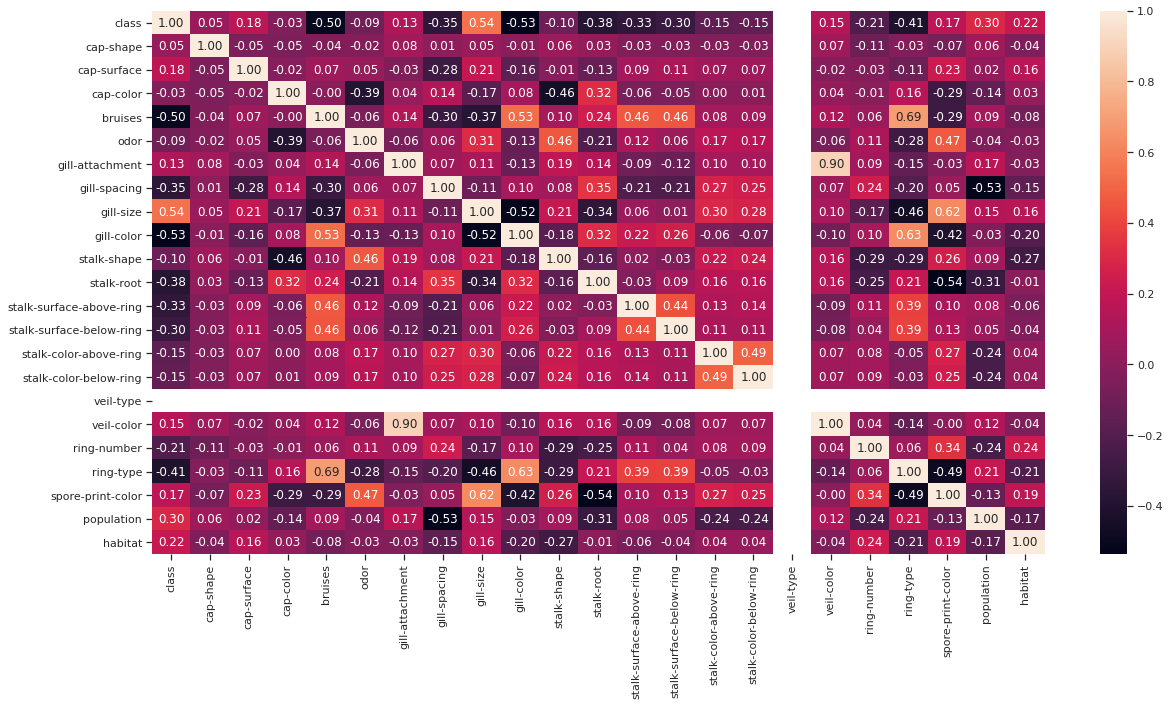

In [77]:
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(data[corr_cols_1].corr(), annot=True, fmt='.2f')

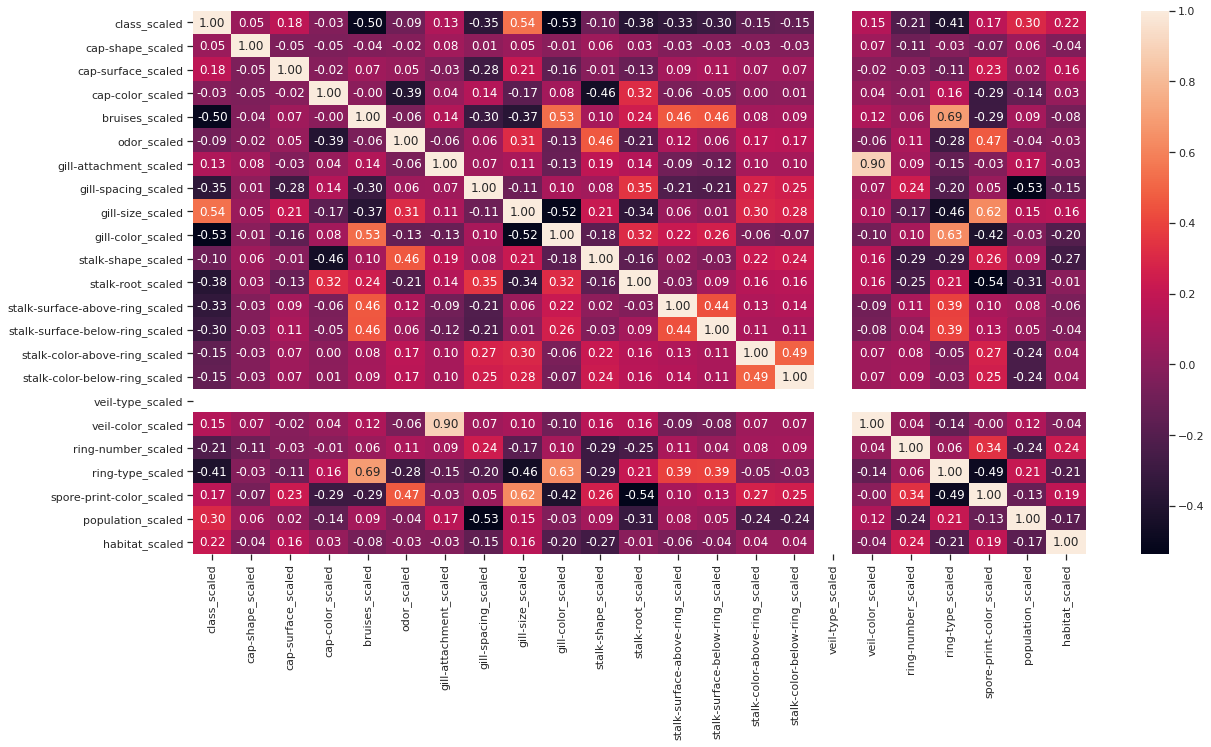

In [79]:
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(data[corr_cols_2].corr(), annot=True, fmt='.2f')

На основе корреляционной матрицы можно сделать следующие выводы:

Признак veil-type можно исключить из рассмотрения, т.к. он для всех одинаков и не несет информации

Корреляционные матрицы для исходных и масштабированных данных совпадают.

Целевой признак классификации "class" наиболее сильно коррелирует с размером гимениальной пластинки (0.54), типом совместного произрастания (0.30) и местом произрастания(0.22). Эти признаки обязательно следует оставить в модели классификации.

Нет признаков, имеющих корреляцию, близкую по модулю к 1, поэтому не стоит ничего исключать из модели.

На основании корреляционной матрицы можно сделать вывод о том, что данные позволяют построить модель машинного обучения.

# **5) Выбор метрик для последующей оценки качества моделей.**

#### **5.1) В качестве метрик для решения задачи классификации будем использовать:**

1. Метрика precision

Доля верно предсказанных классификатором положительных объектов, из всех объектов, которые классификатор верно или неверно определил как положительные.
2. Метрика recall

Доля верно предсказанных классификатором положительных объектов, из всех действительно положительных объектов

3. Метрика F1-мера

Для того, чтобы объединить precision и recall в единую метрику используется Fβ-мера, которая вычисляется как среднее гармоническое от precision и recall(у нас β=1)

4. Метрика ROC AUC

Основана на вычислении следующих характеристик:

True Positive Rate, откладывается по оси ординат. Совпадает с recall.

False Positive Rate, откладывается по оси абсцисс. Показывает какую долю из объектов отрицательного класса алгоритм предсказал неверно.



Разработаем класс, который позволит сохранять метрики качества построенных моделей и реализует визуализацию метрик качества.

In [0]:
class MetricLogger:
    
    def __init__(self):
        self.df = pd.DataFrame(
            {'metric': pd.Series([], dtype='str'),
            'alg': pd.Series([], dtype='str'),
            'value': pd.Series([], dtype='float')})

    def add(self, metric, alg, value):
        """
        Добавление значения
        """
        # Удаление значения если оно уже было ранее добавлено
        self.df.drop(self.df[(self.df['metric']==metric)&(self.df['alg']==alg)].index, inplace = True)
        # Добавление нового значения
        temp = [{'metric':metric, 'alg':alg, 'value':value}]
        self.df = self.df.append(temp, ignore_index=True)

    def get_data_for_metric(self, metric, ascending=True):
        """
        Формирование данных с фильтром по метрике
        """
        temp_data = self.df[self.df['metric']==metric]
        temp_data_2 = temp_data.sort_values(by='value', ascending=ascending)
        return temp_data_2['alg'].values, temp_data_2['value'].values
    
    def plot(self, str_header, metric, ascending=True, figsize=(5, 5)):
        """
        Вывод графика
        """
        array_labels, array_metric = self.get_data_for_metric(metric, ascending)
        fig, ax1 = plt.subplots(figsize=figsize)
        pos = np.arange(len(array_metric))
        rects = ax1.barh(pos, array_metric,
                         align='center',
                         height=0.5, 
                         tick_label=array_labels)
        ax1.set_title(str_header)
        for a,b in zip(pos, array_metric):
            plt.text(0.5, a-0.05, str(round(b,3)), color='white')
        plt.show()    

# **6) Выбор наиболее подходящих моделей для решения задачи классификации.**

Для задачи классификации будем использовать следующие модели(отмечены знаком "+"):

Логистическая регрессия

Метод ближайших соседей +

Машина опорных векторов

Решающее дерево +

Случайный лес +

Градиентный бустинг

# **7) Формирование обучающей и тестовой выборок на основе исходного набора данных.**

In [0]:
x = data.drop(cols_later,axis = 1)
y = data['class_scaled']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=324)

In [0]:
# Признаки для задачи классификации
task_clas_cols = ['gill-size_scaled', 
                  'population_scaled', 'habitat_scaled']

In [108]:
# Выборки для задачи классификации
clas_x_train = x_train[task_clas_cols]
clas_x_test = x_test[task_clas_cols]
clas_y_train = y_train
clas_y_test = y_test
clas_x_train.shape, clas_x_test.shape, clas_y_train.shape, clas_y_test.shape

((5443, 3), (2681, 3), (5443,), (2681,))

# **8) Построение базового решения (baseline) для выбранных моделей без подбора гиперпараметров. Производится обучение моделей на основе обучающей выборки и оценка качества моделей на основе тестовой выборки.**

**8.1) Решение задачи классификации**

In [0]:
# Модели
clas_models = {#'LogR': LogisticRegression(), 
               'KNN_5':KNeighborsClassifier(n_neighbors=5),
               #'SVC':SVC(),
               'Tree':DecisionTreeClassifier(random_state=1),
               'RF':RandomForestClassifier(random_state=1),
               #'GB':GradientBoostingClassifier()
               }

In [0]:
# Сохранение метрик
clasMetricLogger = MetricLogger()

In [0]:
def clas_train_model(model_name, model, clasMetricLogger):
    model.fit(clas_x_train, clas_y_train)
    y_pred = model.predict(clas_x_test)
    precision = precision_score(clas_y_test.values, y_pred)
    recall = recall_score(clas_y_test.values, y_pred)
    f1 = f1_score(clas_y_test.values, y_pred)
    roc_auc = roc_auc_score(clas_y_test.values, y_pred)
    
    clasMetricLogger.add('precision', model_name, precision)
    clasMetricLogger.add('recall', model_name, recall)
    clasMetricLogger.add('f1', model_name, f1)
    clasMetricLogger.add('roc_auc', model_name, roc_auc)

    print('*****************************************************')
    print(model)
    print('*****************************************************')
    draw_roc_curve(clas_y_test.values, y_pred)
    
    plot_confusion_matrix(model, clas_x_test, clas_y_test.values, 
                      display_labels=['0','1'], 
                      cmap=plt.cm.Blues, normalize='true')
    plt.show()

*****************************************************
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')
*****************************************************


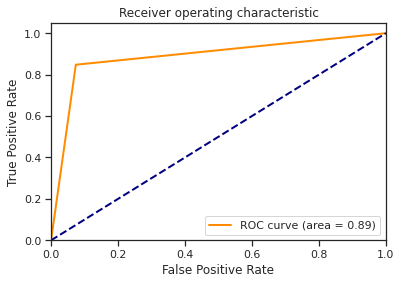

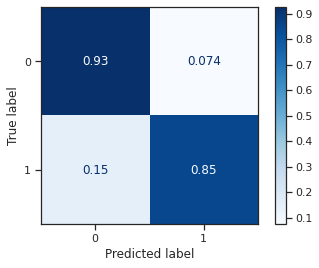

*****************************************************
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')
*****************************************************


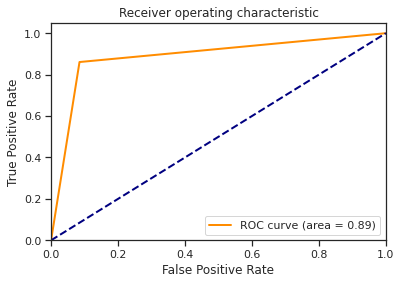

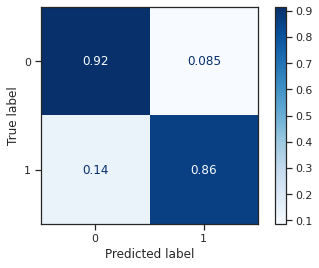

*****************************************************
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)
*****************************************************


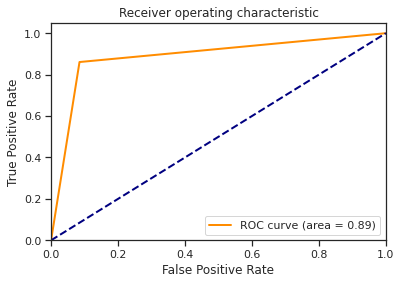

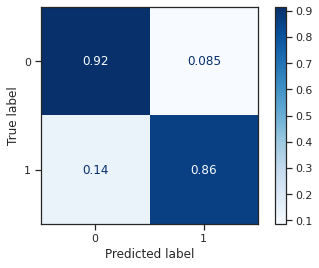

In [137]:
for model_name, model in clas_models.items():
    clas_train_model(model_name, model, clasMetricLogger)

# **9) Подбор гиперпараметров для выбранных моделей. Рекомендуется использовать методы кросс-валидации. В зависимости от используемой библиотеки можно применять функцию GridSearchCV, использовать перебор параметров в цикле, или использовать другие методы.**

In [149]:
clas_x_train.shape

(5443, 3)

In [150]:
n_range = np.array(range(1,2000,100))
tuned_parameters = [{'n_neighbors': n_range}]
tuned_parameters

[{'n_neighbors': array([   1,  101,  201,  301,  401,  501,  601,  701,  801,  901, 1001,
         1101, 1201, 1301, 1401, 1501, 1601, 1701, 1801, 1901])}]

In [151]:
%%time
clf_gs = GridSearchCV(KNeighborsClassifier(), tuned_parameters, cv=5, scoring='roc_auc')
clf_gs.fit(clas_x_train, clas_y_train)

CPU times: user 45.3 s, sys: 107 ms, total: 45.4 s
Wall time: 45.4 s


In [152]:
# Лучшая модель
clf_gs.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=101, p=2,
                     weights='uniform')

In [153]:
# Лучшее значение параметров
clf_gs.best_params_

{'n_neighbors': 101}

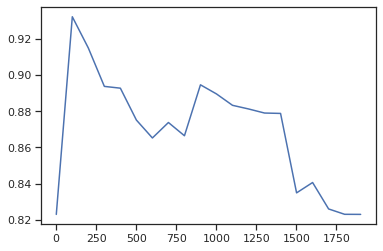

In [154]:
# Изменение качества на тестовой выборке в зависимости от К-соседей
plt.plot(n_range, clf_gs.cv_results_['mean_test_score'])

In [155]:
n_range = np.array(range(1,20,1))
tuned_parameters = [{'max_depth': n_range}]
tuned_parameters

[{'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
         18, 19])}]

In [156]:
clf_gs_dt = GridSearchCV(DecisionTreeClassifier(random_state=1), tuned_parameters,
                          cv=5, scoring='roc_auc')
clf_gs_dt.fit(x_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=1, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid=[{'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19

In [157]:
clf_gs_dt.best_params_

{'max_depth': 7}

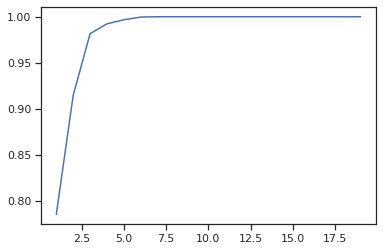

In [158]:
plt.plot(n_range, clf_gs_dt.cv_results_['mean_test_score'])

In [159]:
n_range = np.array(range(1,200,20))
tuned_parameters = [{'n_estimators': n_range}]
tuned_parameters

[{'n_estimators': array([  1,  21,  41,  61,  81, 101, 121, 141, 161, 181])}]

In [160]:
clf_gs_rf = GridSearchCV(RandomForestClassifier(random_state=1), tuned_parameters,
                          cv=5, scoring='roc_auc')
clf_gs_rf.fit(x_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=1,
                                   

In [161]:
clf_gs_rf.best_params_

{'n_estimators': 21}

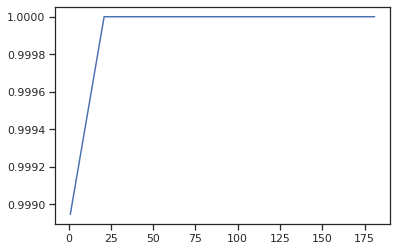

In [162]:
plt.plot(n_range, clf_gs_rf.cv_results_['mean_test_score'])

# **10) Повторение пункта 8 для найденных оптимальных значений гиперпараметров. Сравнение качества полученных моделей с качеством baseline-моделей.**

In [0]:
clas_models_grid = {'KNN_101':clf_gs.best_estimator_,
                    'Tree_7':clf_gs_dt.best_estimator_,
                    'RF_21':clf_gs_rf.best_estimator_}

*****************************************************
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=101, p=2,
                     weights='uniform')
*****************************************************


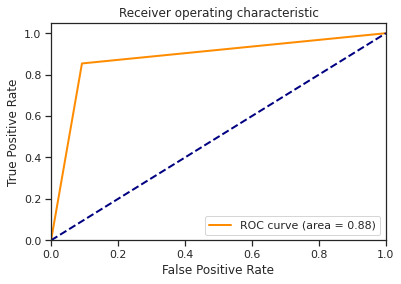

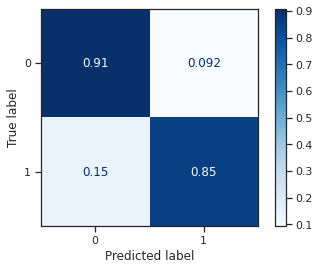

*****************************************************
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')
*****************************************************


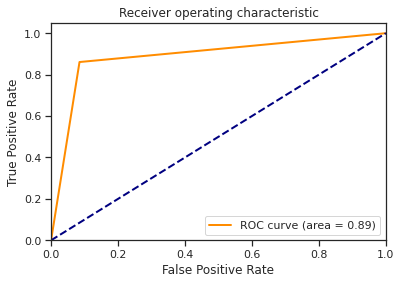

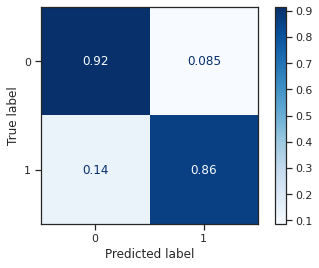

*****************************************************
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=21,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)
*****************************************************


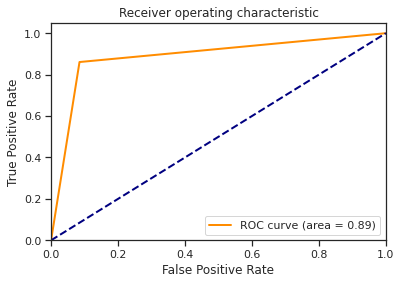

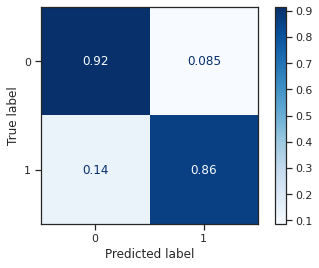

In [164]:
for model_name, model in clas_models_grid.items():
    clas_train_model(model_name, model, clasMetricLogger)

# **11) Формирование выводов о качестве построенных моделей на основе выбранных метрик. Результаты сравнения качества рекомендуется отобразить в виде графиков и сделать выводы в форме текстового описания. Рекомендуется построение графиков обучения и валидации, влияния значений гиперпарметров на качество моделей и т.д.**

In [165]:
# Метрики качества модели
clas_metrics = clasMetricLogger.df['metric'].unique()
clas_metrics

array(['precision', 'recall', 'f1', 'roc_auc'], dtype=object)

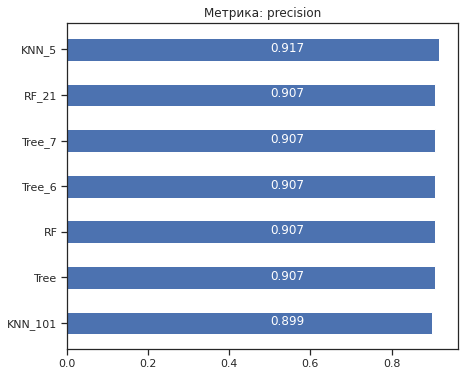

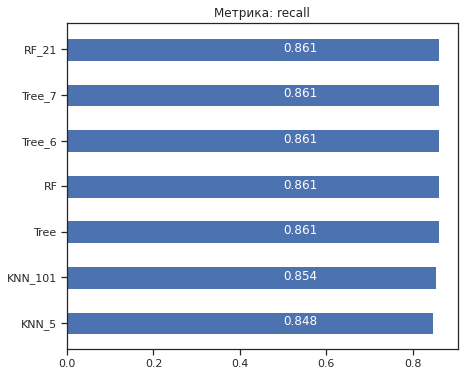

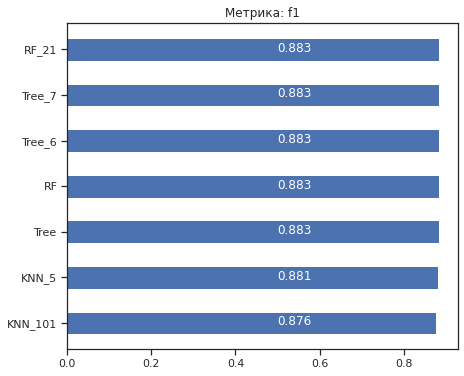

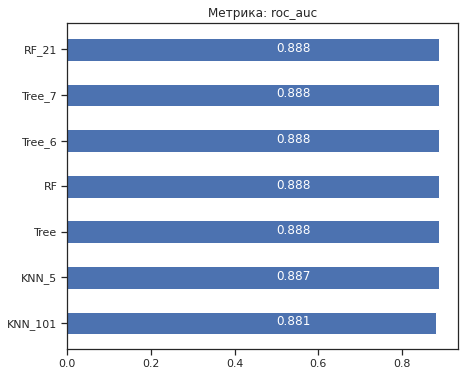

In [166]:
# Построим графики метрик качества модели
for metric in clas_metrics:
    clasMetricLogger.plot('Метрика: ' + metric, metric, figsize=(7, 6))

## **Вывод: наилучшим оказался метод ближайших соседей.**